### Intalling libs

In [32]:
# pip install pydotplus
# !pip install scikit-plot

### Column description

| Variável 	| Descrição 	|
|:-:	|:-	|
| PassangerID 	| ID de identificação do passageiro(a) 	|
| Survived 	| se o passageiro(a) sobreviveu (0 = não, 1 = sim) 	|
| Pclass 	| classe do passageiro:<br>     * **1 = primeira**,<br>     * **2 = segunda**,<br>     * **3 = terceira** 	|
| name 	| nome do passageiro(a) 	|
| sex 	| sexo do passageiro(a) 	|
| age 	| idade do passageiro(a) 	|
| Sibsp 	| número de irmão(ãs)/esposo(a) à bordo 	|
| Parch 	| número de pais/filhos(as) à bordo 	|
| Ticket 	| número da passagem 	|
| Fare 	| preço da passagem 	|
| Cabin 	| cabine 	|
| Embarked 	| local que o passageiro(a) embarcou:<br>     * **C = Cherboug**,<br>     * **Q = Queenstown**,<br>     * **S = Southamption** 	|
| WikiId 	| ID de identificação do passageiro(a) segundo Wikipedia 	|
| Name_wiki 	| nome do passageiro(a) 	|
| Age_wiki 	| idade do passageiro(a) 	|
| Hometown 	| cidade de nascimento do passageiro(a) 	|
| Boarded 	| cidade de embarque 	|
| Destination 	| destino da viagem 	|
| Lifeboat 	| identificação do bote salva-vidas 	|
| Body 	| número de identificação do corpo 	|


<font color='red'>**IMPORTANT**</font>

The new features (the ones after 'Embarked') are very similar to the original ones but they are more up-to-date and have much fewer missing values. Therefore, users can decide on the preferred features themselves.

### Importing Libs

In [35]:
# data visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import (
    jointplot,
    pairplot,
    boxplot,
    heatmap
)

from yellowbrick.features import (
    Rank2D, 
    RadViz,
    FeatureImportances,
    ParallelCoordinates,
    JointPlotVisualizer,
)

from yellowbrick.classifier import (
    ConfusionMatrix
)

import dtreeviz

import pydotplus

from io import(
    StringIO
)

from IPython.display import (
    Image
)

# data manipulation
import numpy as np
import pandas as pd
from pandas.plotting import(
    radviz
)
import janitor as jn

from ydata_profiling import ProfileReport

# missing values
import missingno as msno

from sklearn.impute import (
    SimpleImputer
)

# machine learning models
from sklearn import (
    tree,
    impute,
    ensemble,
    preprocessing,
    model_selection
)

from sklearn.utils import (
    resample
)

from sklearn.dummy import (
    DummyClassifier
)

from sklearn.model_selection import (
    train_test_split
)

from sklearn.experimental import (
    enable_iterative_imputer
)

from sklearn.linear_model import (
    LogisticRegression
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.tree import (
    DecisionTreeClassifier,
    export_graphviz,
    plot_tree
)

from sklearn.neighbors import (
    KNeighborsClassifier
)

from sklearn.naive_bayes import (
    GaussianNB
)

from sklearn.svm import (
    SVC
)

from sklearn.ensemble import (
    RandomForestClassifier
)

from imblearn.over_sampling import (
    RandomOverSampler,
)

import rfpimp

import lightgbm as lgb

import xgboost as xgb

import xgbfir

# data model metrics
from sklearn.metrics import (
    auc,
    f1_score,
    roc_curve,
    recall_score,
    roc_auc_score,
    accuracy_score,
    precision_score,
    confusion_matrix,
    average_precision_score
)

import scikitplot as skplt

from yellowbrick.classifier import (
    ROCAUC,
    ConfusionMatrix,
    ClassificationReport,
    PrecisionRecallCurve
)

from yellowbrick.model_selection import (
    LearningCurve,
    ValidationCurve,
)

# data prep-model
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    learning_curve
)

# model deploy
import pickle

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/scikitplot/plotters.py:33: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0


### Reading the Titanic Dataset

In [3]:
df = pd.read_csv("titanic_dataset.csv", index_col=0)
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


### Deleting _Class_ feature at the end
We are deleting because is the same as _pclass_ (same result, same data)

In [4]:
df = df.drop('Class', axis = 'columns')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Converting DataFrame Column Names to Lowercase snakecase

In [5]:
df.columns = (df.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

df

,survived,pclass,name,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,wiki_id,name_wiki,age_wiki,hometown,boarded,destination,lifeboat,body
PassengerId,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB


### Preparing the dataset

In [6]:
# dropping columns taht do not add value
df = df.drop(columns = ['name',
                        'name_wiki',
                        'wiki_id',
                        'hometown',
                        'destination',
                        'ticket',
                        'lifeboat',
                        'body',
                        'cabin',
                        'age'])

# using get_dummies function to convert object to int
df = pd.get_dummies(df)

# dropping redundant features
df = df.drop(columns = ['sex_male'])

#remove rows with any values that are not finite (NaN or infite)
df = df[np.isfinite(df).all(1)]

# first, we need to create a series of the target feature
y = df.survived

# then, we create a DataFrame with the attributes
X = df.drop(columns = ['survived'])

# using the scikit-learn to split 30% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
X.isnull().sum()

pclass                 0
sib_sp                 0
parch                  0
fare                   0
age_wiki               0
sex_female             0
embarked_C             0
embarked_Q             0
embarked_S             0
boarded_Belfast        0
boarded_Cherbourg      0
boarded_Queenstown     0
boarded_Southampton    0
dtype: int64

## Metrics and Evaluation of Results
All metrics and results evaluated were using a decision tree model.

### Confusion Matrix
We can use a confusion matrix to help evaluate the model and the performance of a classifier.<br><br>
A binary classifier can have four results:
- true positive (TP)
- true negatives (TN)
- false positives (FP)
    - type 1 error
- false negatives (FN)
    - type 2 error

#### Ideally, the counters on the diagonal line should be raised.
Next, we will create a DataFrame using skear's *confusion_matrix* function

In [8]:
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)

dt.fit(X_train, y_train)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_predict = dt.predict(X_test)

pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=[
        "Predict Died",
        "Predict Survive"
    ],
    index=["True Death", "True Survive"]
)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

,Predict Died,Predict Survive
True Death,149,14
True Survive,44,60


Using Yeallowbrick lib to plot *Confusion Matrix*

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is depreca

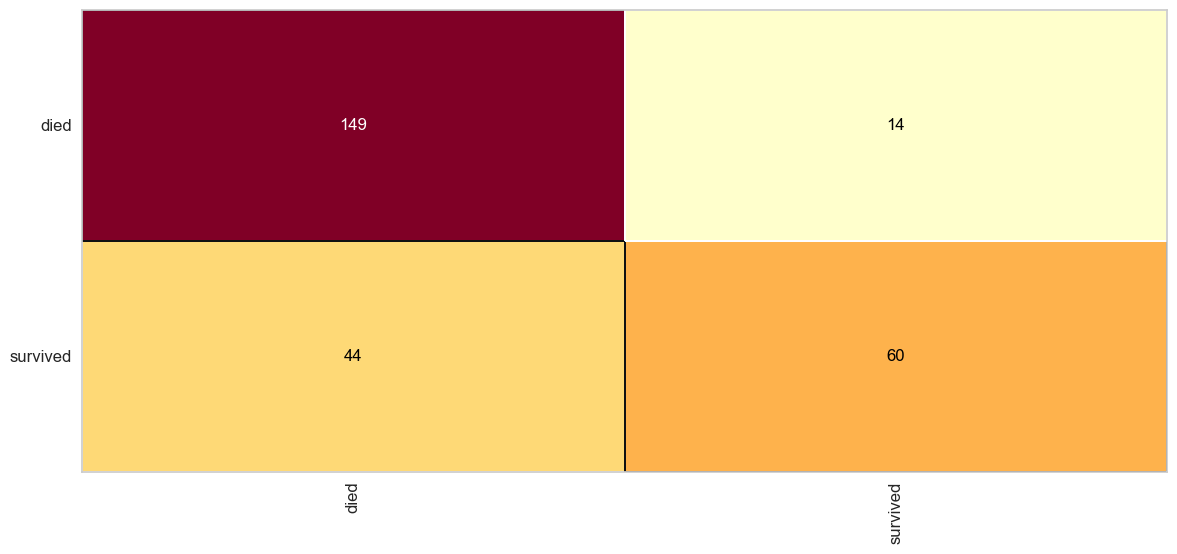

In [10]:
mapping = {0: "died", 1: "survived"}

fig, ax = plt.subplots(figsize=(14, 6))

cm_viz = ConfusionMatrix(
    dt,
    classes=["died", "survived"],
    label_encoder=mapping
)

cm_viz.score(X_test, y_test)

fig.savefig("images/metrics_and_evaluation_confusion_matrix_yellowbrick")

### Metrics
The *sklearn.metrics* module implements several very common metrics for classification. They are:<br><br>
*accuracy*
- percentage of correct predictions

*average_precision*
- precision and recall curve summary

*f1*
- harmonic mean of precision and recall

*neg_log_loss*
- logistic or cross-entropy loss

*precision*
- ability to find only relevant samples

*recall*
- ability to find all positive samples

*roc_auc*
- area under the ROC curve<br><br>

These strings (*metrics*) can be used in the *scoring* parameter in a search such as *grid search*

#### accuracy

In [11]:
y_predict = dt.predict(X_test)

accuracy_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7827715355805244

#### recall

In [12]:
y_predict = dt.predict(X_test)

recall_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.5769230769230769

#### precision

In [13]:
y_predict = dt.predict(X_test)

precision_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.8108108108108109

#### f1

In [14]:
y_predict = dt.predict(X_test)

f1_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.6741573033707865

#### Classification Report
Yellowbrick has a report and classification that shows *precision*, *recall*, *f1* scores, for both positive and negative values. It is a colorful report, and the redder the cell, the higher its score (close to 1)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/classifier/base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is depreca

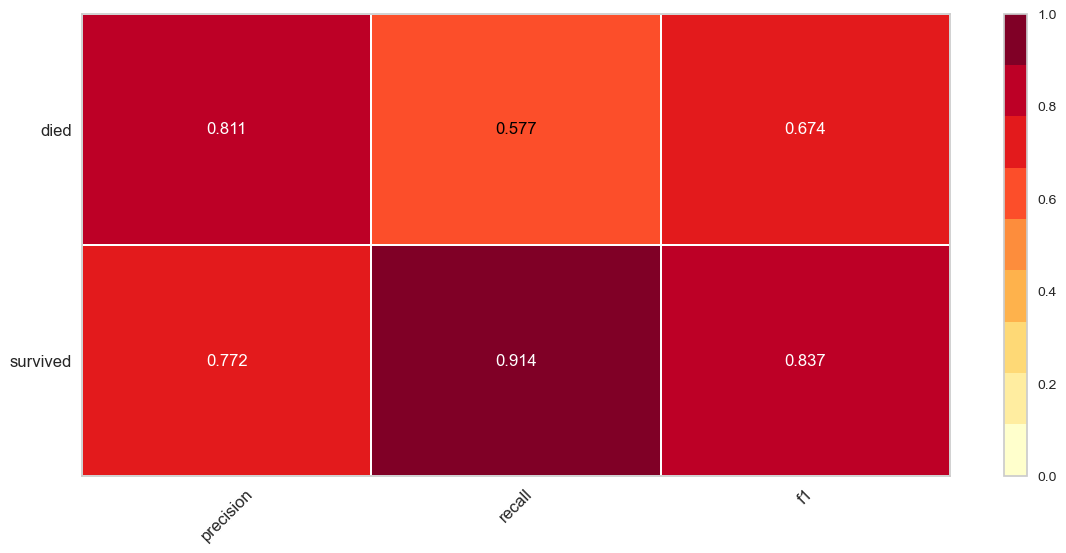

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

cr_viz = ClassificationReport(
    dt,
    classes=["died", "survived"],
    label_encoder=mapping
)

cr_viz.score(X_test, y_test)

fig.savefig("images/metrics_and_evaluation_classification_report_yellowbrick")

### ROC
The ROC curve shows the performance of the classifier, displaying the true positive rate (recall/sensitivity) as the false positive rate (inverted specificity) changes.<br>
A general rule of thumb is that the chart should have a bulge toward the top left corner. A line that is to the left and above the other signals better performance. The diagonal in the graph displays the behavior of a classifier with random guesses.

In [16]:
y_predict = dt.predict(X_test)

roc_auc_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.7455167531854648

#### Yellowbrick is able to plot this graph

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is dep

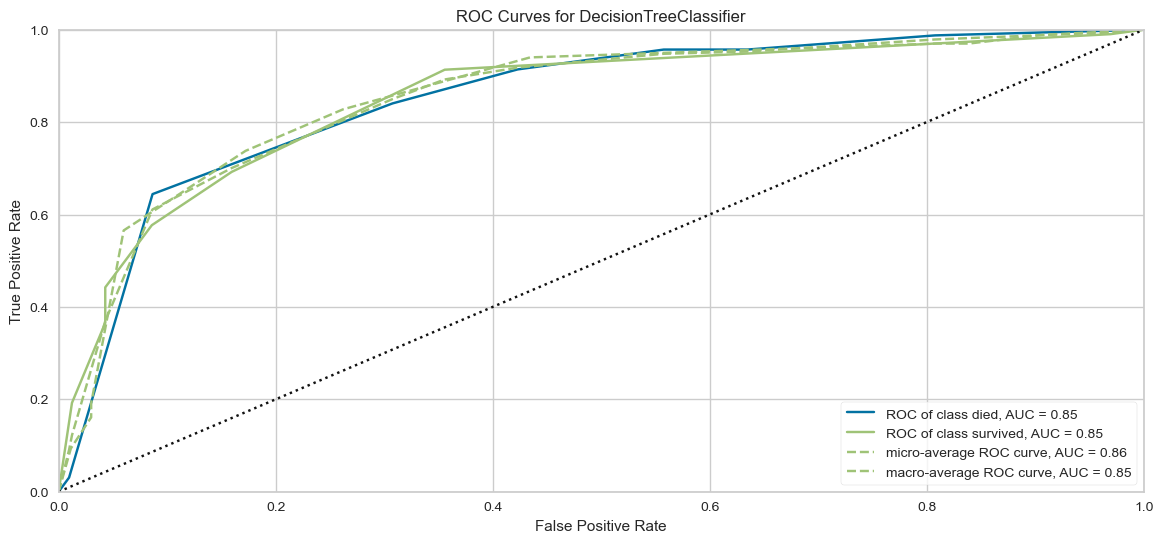

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

roc_auc_viz = ROCAUC(dt, classes=["died", "survived"])
roc_auc_viz.fit(X_train, y_train)
roc_auc_viz.score(X_test, y_test)

roc_auc_viz.show()

fig.savefig("images/metrics_and_evaluation_roc_auc_yellowbrick")

#### Precision-Recall Curve
The ROC curve may be too optimistic for unbalanced classes. Another option for evaluating classifiers is the precision-recall curve.<br><br>
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

In [21]:
y_predict = dt.predict(X_test)

average_precision_score(y_test, y_predict)

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

0.6325694752661044

#### Yellowbrick is able to plot this graph

0.7530821083947159


/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

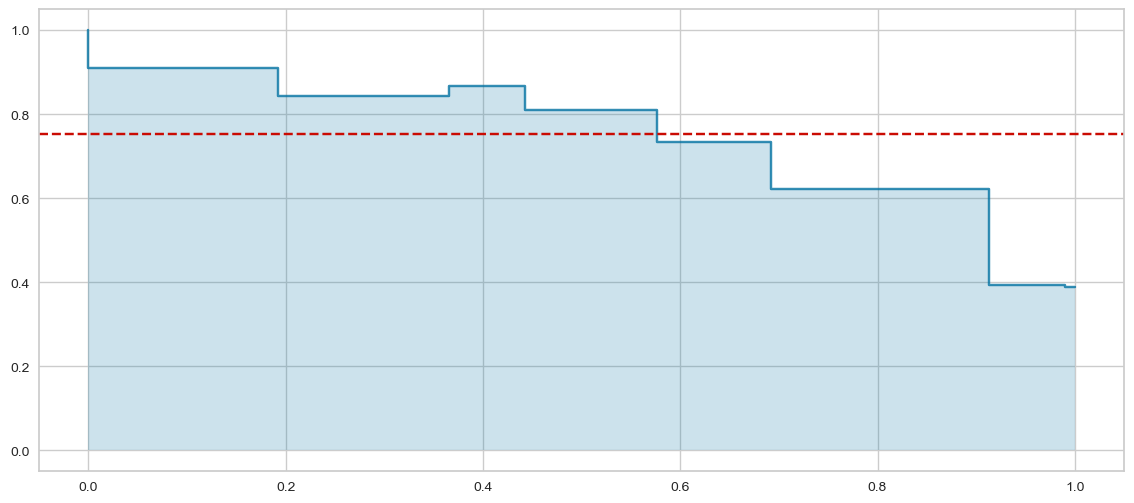

In [41]:
fig, ax = plt.subplots(figsize=(14, 6))

prc_viz = PrecisionRecallCurve(
    DecisionTreeClassifier(max_depth=3)
)

prc_viz.fit(X_train, y_train)

print(prc_viz.score(X_test, y_test))

fig.savefig("images/metrics_and_evaluation_precision_recall_curve_yellowbrick", bbox_inches="tight")

#### Cumulative Gain Chart
A cumulative gain graph can be used to evaluate a binary classifier. This graph models the true positive rate (sensitivity) versus the support rate (fraction of positive predictions). The intuition behind this graph is to order all classifications according to the predicted probability.
<br><br>
A common use of these charts is to determine consumer response. Cumulative gain graphs show support, that is, the rate of positive predictions, along the *x-axis*. 
Our chart names this information as "*Percentage of sample*". It shows the sensitivity, the rate of true positives along the *y-axis*. In our chart, this information is called "*Gain*"<br><br>
In our case, we are not contacting consumers, but predicting survival of the Titanic. If we ranked all of the Titanic's passengers based on our survival probability model and considered the first 65%, we would have 90% survivors. If we had an associated cost or revenue per contact/passenger, it would be possible to calculate what the best number would be.<br><br>
In general, a model that is to the left and above the other model will be better. The best models are lines that go up and then directly to the right. If the trace is below the baseline, it is better to assign labels randomly rather than using our model.

/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/Users/dellacorte/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:17

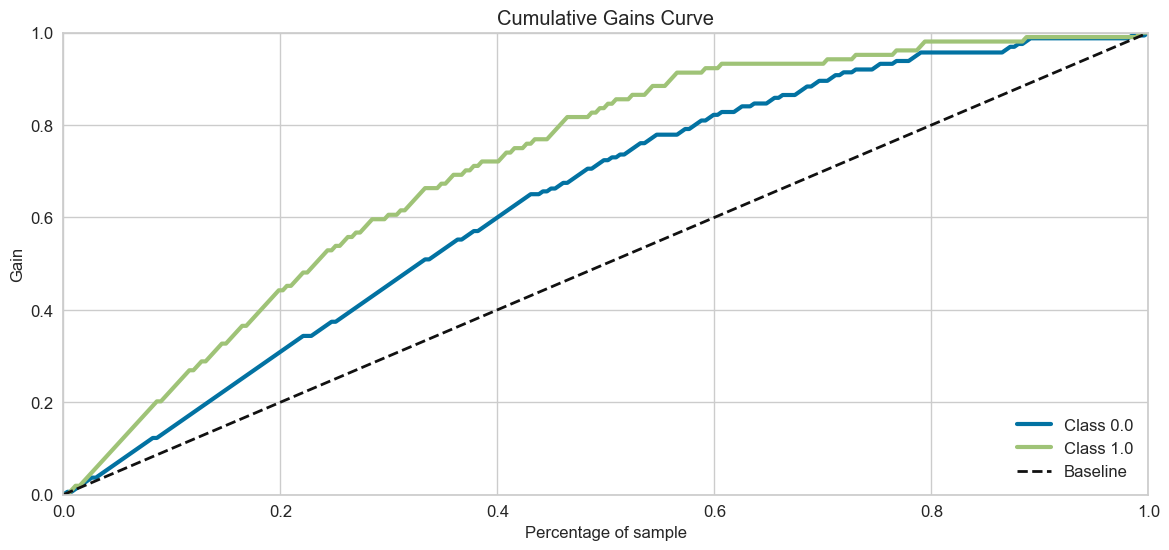

In [40]:
fig, ax = plt.subplots(figsize=(14, 6))

y_probas = dt.predict_proba(X_test)

skplt.metrics.plot_cumulative_gain(
    y_test, y_probas, ax=ax
)

fig.savefig("images/metrics_and_evaluation_cumulative_gain_scikit_plot", bbox_inches="tight")